In [3]:
import nltk
nltk.download('stopwords', 'punkt', 'wordnet')

True

In [9]:
import pandas as pd
df = pd.read_csv('../resources/Ratings_Warriner_et_al.csv',index_col=0) # DATASET IS XANEW

# Scale of the ratings is from 1 to 9

In [10]:
df

,Word,V.Mean.Sum,V.SD.Sum,V.Rat.Sum,A.Mean.Sum,A.SD.Sum,A.Rat.Sum,D.Mean.Sum,D.SD.Sum,D.Rat.Sum,...,A.Rat.L,A.Mean.H,A.SD.H,A.Rat.H,D.Mean.L,D.SD.L,D.Rat.L,D.Mean.H,D.SD.H,D.Rat.H
1,aardvark,6.26,2.21,19,2.41,1.40,22,4.27,1.75,15,...,11,2.55,1.29,11,4.12,1.64,8,4.43,1.99,7
2,abalone,5.30,1.59,20,2.65,1.90,20,4.95,1.79,22,...,12,2.38,1.92,8,5.55,2.21,11,4.36,1.03,11
3,abandon,2.84,1.54,19,3.73,2.43,22,3.32,2.50,22,...,11,3.82,2.14,11,2.77,2.09,13,4.11,2.93,9
4,abandonment,2.63,1.74,19,4.95,2.64,21,2.64,1.81,28,...,14,5.29,2.63,7,2.31,1.45,16,3.08,2.19,12
5,abbey,5.85,1.69,20,2.20,1.70,20,5.00,2.02,25,...,9,2.55,1.92,11,4.83,2.18,18,5.43,1.62,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13911,zone,4.75,2.05,20,3.78,2.53,18,5.23,1.82,22,...,9,4.89,1.76,9,5.09,1.81,11,5.36,1.91,11
13912,zoning,4.65,1.60,20,3.77,1.95,22,4.47,2.20,19,...,12,3.70,1.57,10,5.17,2.32,6,4.15,2.15,13
13913,zoo,7.00,1.58,21,5.63,2.54,19,6.33,2.56,21,...,13,5.17,2.14,6,5.67,2.87,12,7.22,1.86,9
13914,zoom,5.86,1.53,21,5.68,2.54,19,5.90,2.17,21,...,8,6.27,2.45,11,6.00,2.12,9,5.83,2.29,12


In [8]:
df.columns

Index(['Word', 'V.Mean.Sum', 'V.SD.Sum', 'V.Rat.Sum', 'A.Mean.Sum', 'A.SD.Sum',
       'A.Rat.Sum', 'D.Mean.Sum', 'D.SD.Sum', 'D.Rat.Sum', 'V.Mean.M',
       'V.SD.M', 'V.Rat.M', 'V.Mean.F', 'V.SD.F', 'V.Rat.F', 'A.Mean.M',
       'A.SD.M', 'A.Rat.M', 'A.Mean.F', 'A.SD.F', 'A.Rat.F', 'D.Mean.M',
       'D.SD.M', 'D.Rat.M', 'D.Mean.F', 'D.SD.F', 'D.Rat.F', 'V.Mean.Y',
       'V.SD.Y', 'V.Rat.Y', 'V.Mean.O', 'V.SD.O', 'V.Rat.O', 'A.Mean.Y',
       'A.SD.Y', 'A.Rat.Y', 'A.Mean.O', 'A.SD.O', 'A.Rat.O', 'D.Mean.Y',
       'D.SD.Y', 'D.Rat.Y', 'D.Mean.O', 'D.SD.O', 'D.Rat.O', 'V.Mean.L',
       'V.SD.L', 'V.Rat.L', 'V.Mean.H', 'V.SD.H', 'V.Rat.H', 'A.Mean.L',
       'A.SD.L', 'A.Rat.L', 'A.Mean.H', 'A.SD.H', 'A.Rat.H', 'D.Mean.L',
       'D.SD.L', 'D.Rat.L', 'D.Mean.H', 'D.SD.H', 'D.Rat.H'],
      dtype='object')

In [12]:
df[['Word','V.Mean.Sum','A.Mean.Sum']].head()

,Word,V.Mean.Sum,A.Mean.Sum
1,aardvark,6.26,2.41
2,abalone,5.30,2.65
3,abandon,2.84,3.73
4,abandonment,2.63,4.95
5,abbey,5.85,2.20


In [25]:
df_1 = df[['Word','V.Mean.Sum','A.Mean.Sum']]
df_1.columns = ['word','V','A']
df_1['normalized_valence'] = df_1['V']/9
df_1['normalized_arousal'] = df_1['A']/9
df_1.head()

/var/folders/hs/h9zhlkvj4b9d3mmzwzsd87vr0000gn/T/ipykernel_7874/632718691.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['normalized_valence'] = df_1['V']/9
/var/folders/hs/h9zhlkvj4b9d3mmzwzsd87vr0000gn/T/ipykernel_7874/632718691.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['normalized_arousal'] = df_1['A']/9


,word,V,A,normalized_valence,normalized_arousal
1,aardvark,6.26,2.41,0.695556,0.267778
2,abalone,5.30,2.65,0.588889,0.294444
3,abandon,2.84,3.73,0.315556,0.414444
4,abandonment,2.63,4.95,0.292222,0.550000
5,abbey,5.85,2.20,0.650000,0.244444


In [37]:
from scipy.spatial import distance
for index, row in df_1.iterrows():
    df_1.loc[index,'distance'] = distance.euclidean([row['normalized_valence'],row['normalized_arousal']],[0.5,0.5])
    if  df_1.loc[index,'distance']<= 0.15:
        df_1.loc[index,'segment'] = 5
    elif row['normalized_valence'] > 0.5 and row['normalized_arousal'] > 0.5:
        df_1.loc[index,'segment'] = 1
    elif row['normalized_valence'] < 0.5 and row['normalized_arousal'] > 0.5:
        df_1.loc[index,'segment'] = 2
    elif row['normalized_valence'] < 0.5 and row['normalized_arousal'] < 0.5:
        df_1.loc[index,'segment'] = 3
    elif row['normalized_valence'] > 0.5 and row['normalized_arousal'] < 0.5:
        df_1.loc[index,'segment'] = 4

array([[<AxesSubplot:title={'center':'segment'}>]], dtype=object)

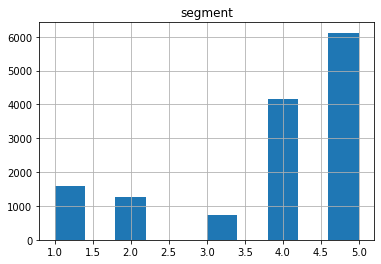

In [39]:
df_1.hist('segment')

In [36]:
df_1.where(df_1['segment']==4).head()

,word,V,A,normalized_valence,normalized_arousal,segment,distance
1,aardvark,6.26,2.41,0.695556,0.267778,4.0,0.303594
2,abalone,5.30,2.65,0.588889,0.294444,4.0,0.223952
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,abbey,5.85,2.20,0.650000,0.244444,4.0,0.296325
